In [1]:
import dd
import pandas as pd
import numpy as np
from getsig import getsig
from scipy.interpolate import interp1d
from scipy.signal import medfilt
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, FancyArrowPatch
#
plt.style.use('helvet2')

In [2]:
t = np.arange(1.20, 6.0, 0.02)
shotnr = 30554

In [3]:
h98 = getsig(shotnr, 'TTH', 'H/L-facs')
beta = getsig(shotnr, 'TOT', 'beta_N')
sd = getsig(shotnr, 'DNE', 'neDdel_2', exper='SFP')
sdfile = np.loadtxt('./SupportFiles/SBD.30554')
sbd = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/krxv0006.txt')
snbi = getsig(30554, 'NIS', 'PNI')
sdtot = getsig(shotnr, 'UVS', 'D_tot')
sntot = getsig(shotnr, 'UVS', 'N_tot')
wmhd = getsig(shotnr,'TOT','Wmhd')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


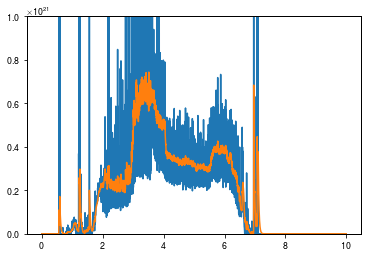

In [4]:
plt.plot(sdfile[:,0],sdfile[:,18])
plt.plot(sbd[:,0],sbd[:,1])
plt.ylim(0,1e21)
plt.show()

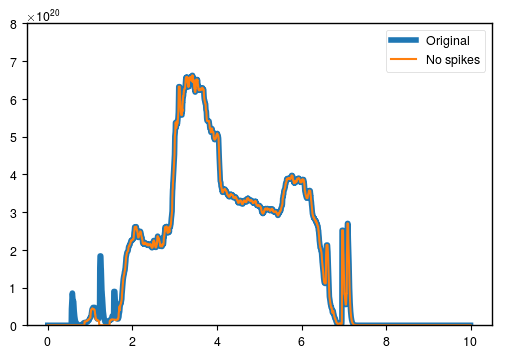

In [5]:
plt.figure(dpi=100)
#plt.plot(td,sd[:,17])
rx6 = medfilt(sd.data[:,17], 51)
rx6time = sd.time

#rx6time = sbd[:,0]
#rx6 = medfilt(sbd[:,1], 51)

plt.plot(sbd[:,0],medfilt(sbd[:,1],21), label='Original', lw=4)
plt.ylim(0,8e20)
#plt.plot(sd.time,rx6)
#Replace rx6 by the kalman version
td = sbd[:,0]
rx6s = medfilt(sbd[:,1],21)
#Graft the original start to avoid strange peaks t<1.9
rx6s[rx6time<1.7]=rx6[td<1.7]

plt.plot(rx6time, rx6s, label='No spikes')
plt.legend()
plt.show()

In [6]:
h98inter = interp1d(h98.time,h98.data[:,7])
h98i = h98inter(t)

#Why is it different with rx6s or rx6???
rx6inter = interp1d(rx6time,medfilt(rx6s,51))
#rx6inter = interp1d(rx6time,rx6)

rx6i = rx6inter(t)

nbi_inter = interp1d(snbi.time, snbi.data)
inbi = nbi_inter(t)
intdtot = interp1d(sdtot.time,sdtot.data)
idtot = intdtot(t)
tau = getsig(shotnr, 'TOT', 'tau_tot')
tauint = interp1d(tau.time,tau.data)
itau = tauint(t)
betaint = interp1d(beta.time,beta.data)
ibeta = betaint(t)

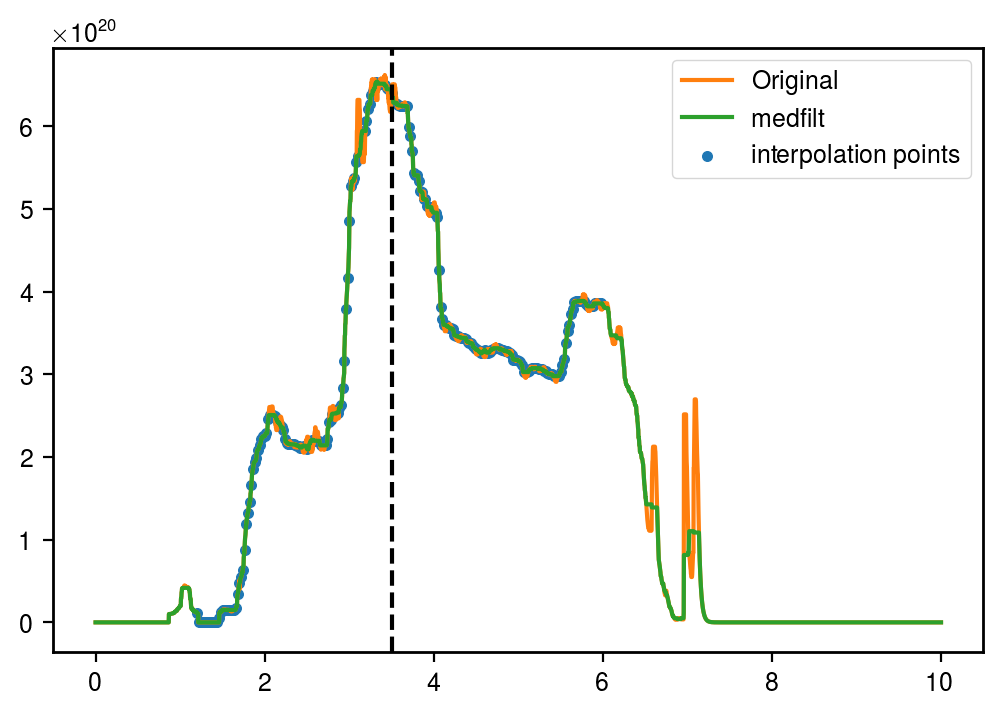

In [7]:
plt.figure(dpi=200)
plt.plot(rx6time, rx6s, label='Original',c='C1')
plt.scatter(t, rx6i, label='interpolation points', s=12)
plt.plot(rx6time, medfilt(rx6s,51), label='medfilt',c='C2')
plt.axvline(3.5, color='k', ls='--')
plt.legend()
plt.show()

In [8]:
clr2 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
timesint = np.array([1.65, 2.9, 3.5, 5.5, 6.0])

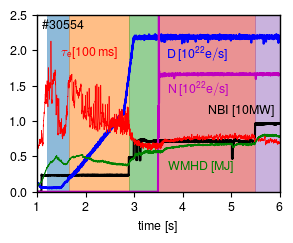

In [9]:
plt.figure(figsize=(3,2.5),dpi=100)
plt.plot(snbi.time, snbi.data*1e-7,color='k')
plt.text(5.9,1.1,'NBI [10MW]',color='k',ha='right')

plt.plot(sdtot.time, sdtot.data*1e-22,color='b')
plt.text(3.7,1.9,r'$\mathrm{D\,[10^{22}e/s]}$', color='b',ha='left')

plt.plot(sntot.time, sntot.data*1e-22,color='m')
plt.text(3.7,1.4,r'$\mathrm{N\,[10^{22}e/s]}$', color='m')

plt.plot(tau.time,tau.data*1e1,color='r',lw=0.5)
plt.text(1.5,1.9,r'$\mathrm{\tau_{e} [100\,ms]}$',color='r',ha='left')

plt.plot(wmhd.time,wmhd.data*1e-6,color='g',lw=0.8)
plt.text(3.7,0.3,'WMHD [MJ]',color='g')

plt.text(1.1, 2.3, '\#30554', color='k')

#plt.text(4.0,3.0,r'$\mathrm{D\,[10^{22}e/s]}$', color='b')
#plt.text(4.0,1.0,r'$\mathrm{N\,[10^{22}e/s]}$', color='m')

alp=0.5
plt.axvspan(1.2,timesint[0],color='C0',alpha=alp)
plt.axvspan(timesint[0],timesint[1],color='C1',alpha=alp)
plt.axvspan(timesint[1],timesint[2],color='C2',alpha=alp)
plt.axvspan(timesint[2],timesint[3],color='C3',alpha=alp)
plt.axvspan(timesint[3],6.0,color='C4',alpha=alp)

plt.xlim(1,6)
plt.ylim(0,2.5)
plt.ylim(bottom=0)
plt.xlabel('time [s]')
plt.tight_layout()
plt.savefig('./Revised/Guide_30554.png',dpi=300)#, transparent=True)
plt.show()

In [10]:
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

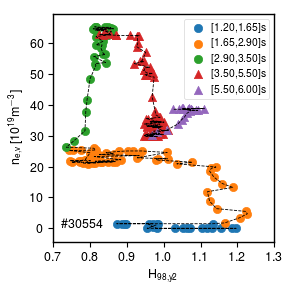

In [11]:
fig = plt.figure(figsize=(3,3), dpi=100)
ax1 = fig.add_subplot(111)

for i in range(len(h98i)):
    mrk = 'o'
    if t[i]<timesint[0]:
        clr=clr2[0]
    elif (t[i]>=timesint[0]) & (t[i]<=timesint[1]):
        clr = clr2[1]
    elif (t[i]>=timesint[1]) & (t[i]<=timesint[2]):
        clr = clr2[2]
    elif (t[i]>=timesint[2]) & (t[i]<=timesint[3]):
        clr = clr2[3]
        mrk = '^'
    else:
        clr = clr2[4]
        mrk = '^'
    ax1.scatter(h98i[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)

#fclr = clr2[0]
#style="Simple,tail_width=3,head_width=8,head_length=8"
#kw = dict(arrowstyle=style, color=fclr,linestyle=None)
#l1 = FancyArrowPatch((0.85,5),(1.3,5), **kw)
#ax1.add_patch(l1)
#ax1.text(1.0, 7, '1', color=fclr, size='large')

#fclr = clr2[1]
#style="Simple,tail_width=3,head_width=8,head_length=8"
#kw = dict(arrowstyle=style, color=fclr,linestyle=None)
#l2 = FancyArrowPatch((1.25,18),(0.8,25), connectionstyle="arc3,rad=.25", **kw)
#ax1.add_patch(l2)
#ax1.text(1.0, 33, '2', color=fclr, size='large')

#fclr = 'b'
#style="Simple,tail_width=3,head_width=8,head_length=8"
#kw = dict(arrowstyle=style, color=fclr,linestyle=None)
#l2 = FancyArrowPatch((0.79,26),(0.79,50),  **kw)
#ax1.add_patch(l2)
#ax1.text(0.8, 40, '3', color=fclr, size='large')

#fclr = 'm'
#style="Simple,tail_width=3,head_width=8,head_length=8"
#kw = dict(arrowstyle=style, color=fclr,linestyle=None)
#l2 = FancyArrowPatch((0.85,60),(0.9,35), connectionstyle="arc3,rad=-.15", **kw)
#ax1.add_patch(l2)
#ax1.text(0.9, 46, '4', color=fclr, size='large')

#Force labels
plt.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
plt.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
plt.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
plt.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
plt.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax1.plot(h98i, rx6i*1e-19, c='k', lw=0.6, ls='--')

plt.text(0.72, 0, '\#30554')
plt.xticks([0.7,0.8,0.9,1.0,1.1,1.2,1.3])

plt.legend(handletextpad=0.2, fontsize='small')
plt.xlim(0.7,1.3)
ax1.set_xlabel(r'$\mathrm{H_{98,y2}}$')
ax1.set_ylabel(r'$\mathrm{n_{e,v}\,[10^{19}m^{-3}]}$')
plt.tight_layout()
#plt.savefig('/home/guimas/Documents/Publications/hmode2016/Figures/Allfigures/Figures/Discharge_evolution.png', dpi=300, transparent=True)
plt.show()

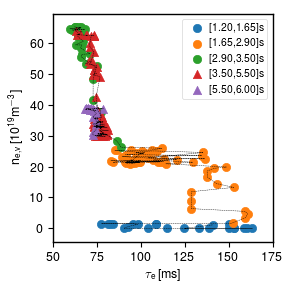

In [12]:
fig = plt.figure(figsize=(3,3), dpi=100)
ax1 = fig.add_subplot(111)

for i in range(len(h98i)):
    mrk = 'o'
    if t[i]<timesint[0]:
        clr=clr2[0]
    elif (t[i]>=timesint[0]) & (t[i]<=timesint[1]):
        clr = clr2[1]
    elif (t[i]>=timesint[1]) & (t[i]<=timesint[2]):
        clr = clr2[2]
    elif (t[i]>=timesint[2]) & (t[i]<=timesint[3]):
        clr = clr2[3]
        mrk = '^'
    else:
        clr = clr2[4]
        mrk = '^'
    ax1.scatter(itau[i]*1e3, rx6i[i]*1e-19, s=35, marker=mrk, c=clr)

#Force labels
plt.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
plt.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
plt.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
plt.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
plt.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax1.plot(itau*1e3,rx6i*1e-19, c='k', lw=0.3, ls='--')

#plt.text(0.72, 0, '\#30554')
plt.xlim(50,175)
plt.xticks([50,75,100,125,150,175])

plt.legend(handletextpad=0.2, fontsize='small')

#ax1.set_xlabel(r'$\mathrm{H_{98,y2}}$')
ax1.set_xlabel(r'$\mathrm{\tau_e\,[ms]}$')
ax1.set_ylabel(r'$\mathrm{n_{e,v}\,[10^{19}m^{-3}]}$')
plt.tight_layout()
#plt.savefig('/home/guimas/Documents/Publications/hmode2016/Figures/Allfigures/Figures/Discharge_tion_tau.png', dpi=300, transparent=True)
plt.show()

### HFSHD (y) as a function of fuelling, confinement time and beta

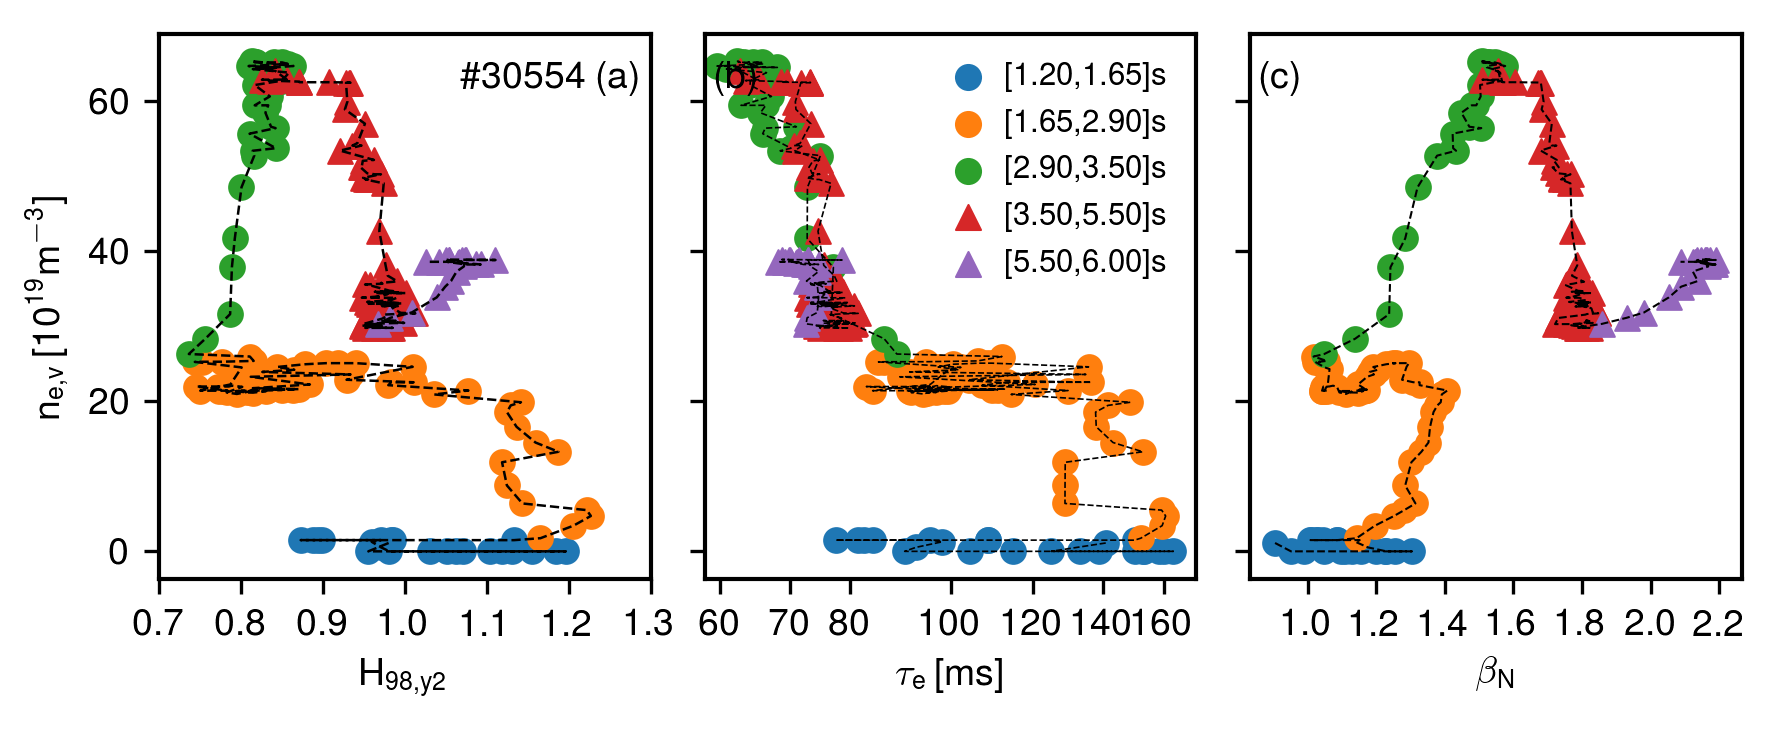

In [13]:
fig, axarr = plt.subplots(
            nrows=1, ncols=3, sharey=True, sharex=False, 
            gridspec_kw={'width_ratios':[1,1,1]},
            figsize=(6, 2.5), dpi=300)

ax0 = axarr[0]
ax1 = axarr[1]
ax2 = axarr[2]

ax0.text(0.98,0.9,'\#30554 (a)', ha='right', transform=ax0.transAxes)
ax1.text(0.02,0.9,'(b)', ha='left', transform=ax1.transAxes)
ax2.text(0.02,0.9,'(c)', ha='left', transform=ax2.transAxes)

#Discharge evolution
ax0.set_ylabel(r'$\mathrm{n_{e,v}\,[10^{19}m^{-3}]}$')
ax0.set_xlabel('time [s]')

###Scatters
for i in range(len(h98i)):
    mrk = 'o'
    if t[i]<timesint[0]:
        clr=clr2[0]
    elif (t[i]>=timesint[0]) & (t[i]<=timesint[1]):
        clr = clr2[1]
    elif (t[i]>=timesint[1]) & (t[i]<=timesint[2]):
        clr = clr2[2]
    elif (t[i]>=timesint[2]) & (t[i]<=timesint[3]):
        clr = clr2[3]
        mrk = '^'
    else:
        clr = clr2[4]
        mrk = '^'
    ax0.scatter(h98i[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
    ax1.scatter(itau[i]*1e3, rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
    ax2.scatter(ibeta[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
        
#Force labels
ax0.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
ax0.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
ax0.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
ax0.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax0.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax0.plot(h98i, rx6i*1e-19, c='k', lw=0.6, ls='--')

ax0.set_xticks([0.7,0.8,0.9,1.0,1.1,1.2,1.3])

plt.legend(handletextpad=0.2, fontsize='small', frameon=False)
ax0.set_xlim(0.7,1.3)
ax0.set_xlabel(r'$\mathrm{H_{98,y2}}$')

#Force labels
ax1.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
ax1.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
ax1.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
ax1.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax1.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax1.plot(itau*1e3,rx6i*1e-19, c='k', lw=0.4, ls='--')

ax1.set_xlim(58,172)

#ax1.xaxis.set_ticks_position('none')
ax1.set_xscale('log')
ax1.minorticks_off()
#ax1.set_xticks([60])
#ax1.set_xticklabels([''])
ax1.set_xticks([60,70,80,100,120,140,160])
ax1.set_xticklabels(['60','70','80','100','120','140','160'])
ax1.legend(handletextpad=0.2, fontsize='small', frameon=False)
ax1.set_xlabel(r'$\mathrm{\tau_e\,[ms]}$')


ax2.plot(ibeta, rx6i*1e-19, c='k', lw=0.5, ls='--')
ax2.set_xlabel(r'$\mathrm{\beta_{N}}$')
ax2.set_xticks([1.0,1.2,1.4,1.6,1.8,2.0,2.2])

#plt.text(0.72, 0, '\#30554')
#ax1.set_xlim(4,5.2)

plt.tight_layout()
plt.subplots_adjust(wspace=0.11)
#plt.savefig('Revised/Discharge_evolution.png',dpi=300)
plt.show()

# With shot evolution

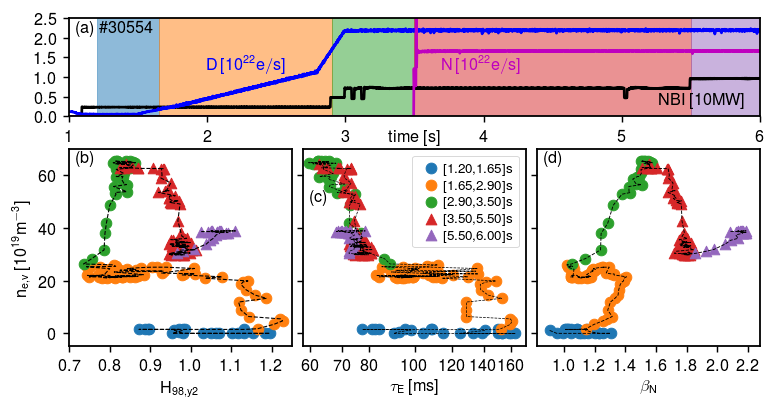

In [14]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(6,3.), dpi=130)

gs = gridspec.GridSpec(2, 3, height_ratios=[1, 2])

#ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
#ax2 = plt.subplot2grid((3,3), (1,0), rowspan=2)
#ax3 = plt.subplot2grid((3,3), (1,1), rowspan=2, sharey=ax2)
#ax4 = plt.subplot2grid((3,3), (1,2), rowspan=2, sharey=ax2)

ax1 = plt.subplot(gs[0, :])

ax1.plot(snbi.time, snbi.data*1e-7,color='k')
ax1.text(5.9,0.3,'NBI [10MW]',color='k',ha='right')

ax1.plot(sdtot.time, sdtot.data*1e-22,color='b')
ax1.text(2.0,1.2,r'$\mathrm{D\,[10^{22}e/s]}$', color='b',ha='left')

ax1.plot(sntot.time, sntot.data*1e-22,color='m')
plt.text(3.7,1.2,r'$\mathrm{N\,[10^{22}e/s]}$', color='m')

#ax1.plot(tau.time,tau.data*1e1,color='r',lw=0.5)
#ax1.text(1.7,1.8,r'$\mathrm{\tau_{e} [100\,ms]}$',color='r',ha='left')

#ax1.plot(beta.time,beta.data,color='g',lw=0.8)
#ax1.text(2.6,1.3,r'$\mathrm{\beta_N}$',color='g')

#ax1.plot(h98.time,h98.data[:,7],color='C7')
#ax1.text(5.9,1.2,r'$\mathrm{H_{98,y2}}$',color='C7',ha='right')

#ax1.plot(wmhd.time,wmhd.data*1e-6,color='g',lw=0.8)
#ax1.text(3.7,0.3,'WMHD [MJ]',color='g')

ax1.text(0.01, 0.85, '(a) \#30554', color='k', transform=ax1.transAxes)

alp=0.5
ax1.axvspan(1.2,timesint[0],color='C0',alpha=alp)
ax1.axvspan(timesint[0],timesint[1],color='C1',alpha=alp)
ax1.axvspan(timesint[1],timesint[2],color='C2',alpha=alp)
ax1.axvspan(timesint[2],timesint[3],color='C3',alpha=alp)
ax1.axvspan(timesint[3],6.0,color='C4',alpha=alp)

ax1.set_xlim(1,6)
ax1.set_ylim(0,2.5)
ax1.set_yticks([0.0,0.5,1.0,1.5,2.0,2.5])
ax1.set_ylim(bottom=0)
ax1.set_xlabel('time [s]', labelpad=-8)

ax2 = plt.subplot(gs[1, :-2],)
ax3 = plt.subplot(gs[1, 1:-1], sharey=ax2)
ax4 = plt.subplot(gs[1, 2:], sharey=ax2)

plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
###############################
ax2.set_ylabel(r'$\mathrm{n_{e,v}\,[10^{19}m^{-3}]}$')

###Scatters
for i in range(len(h98i)):
    mrk = 'o'
    if t[i]<timesint[0]:
        clr=clr2[0]
    elif (t[i]>=timesint[0]) & (t[i]<=timesint[1]):
        clr = clr2[1]
    elif (t[i]>=timesint[1]) & (t[i]<=timesint[2]):
        clr = clr2[2]
    elif (t[i]>=timesint[2]) & (t[i]<=timesint[3]):
        clr = clr2[3]
        mrk = '^'
    else:
        clr = clr2[4]
        mrk = '^'
    ax2.scatter(h98i[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
    ax3.scatter(itau[i]*1e3, rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
    ax4.scatter(ibeta[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)


#Force labels
ax2.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
ax2.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
ax2.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
ax2.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax2.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax2.plot(h98i, rx6i*1e-19, c='k', lw=0.6, ls='--')

ax2.set_xticks([0.7,0.8,0.9,1.0,1.1,1.2])

plt.legend(handletextpad=0.2, fontsize='small', frameon=False)
ax2.set_xlim(0.7,1.25)
ax2.set_xlabel(r'$\mathrm{H_{98,y2}}$')

#Force labels
ax3.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
ax3.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
ax3.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
ax3.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax3.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax3.plot(itau*1e3,rx6i*1e-19, c='k', lw=0.4, ls='--')

ax3.set_xlim(58,172)

#ax1.xaxis.set_ticks_position('none')
ax3.set_xscale('log')
ax3.minorticks_off()
#ax1.set_xticks([60])
#ax1.set_xticklabels([''])
ax3.set_xticks([60,70,80,100,120,140,160])
ax3.set_xticklabels(['60','70','80','100','120','140','160'])
ax3.legend(handletextpad=-0.1,labelspacing=0.2,fontsize='small')
ax3.set_xlabel(r'$\mathrm{\tau_E\,[ms]}$')

ax4.plot(ibeta, rx6i*1e-19, c='k', lw=0.5, ls='--')
ax4.set_xlabel(r'$\mathrm{\beta_{N}}$')
ax4.set_xticks([1.0,1.2,1.4,1.6,1.8,2.0,2.2])

xxx = 0.03
yyy = 0.93
ax2.text(xxx,yyy,'(b)',transform=ax2.transAxes)
ax3.text(xxx,yyy-0.2,'(c)',transform=ax3.transAxes)
ax4.text(xxx,yyy,'(d)',transform=ax4.transAxes)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05,hspace=0.22,bottom=0.14,top=0.98, right=0.98)
plt.savefig('Revised/Discharge_evolution.png',dpi=300)
plt.show()

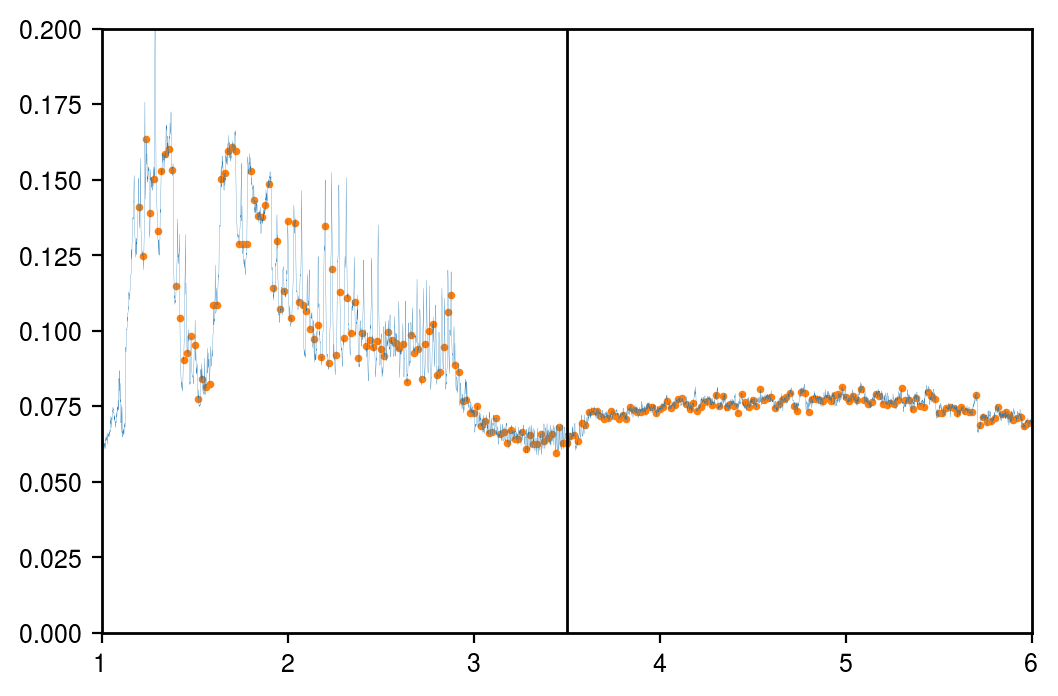

In [15]:
plt.figure(dpi=200)
plt.plot(tau.time,tau.data,lw=0.1)
plt.scatter(t,itau,c='C1',s=5)
#plt.plot(tau.time,medfilt(tau.data, 13),lw=1)
#plt.plot(t,itau)
plt.axvline(3.5,color='k',lw=1)
plt.ylim(0,0.2)
plt.xlim(1,6)
plt.show()

# For Presentation

In [24]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(6,5.), dpi=130)

gs = gridspec.GridSpec(2, 3, height_ratios=[1, 2])
ticfont = 11
plt.rcParams.update({'font.size': ticfont})

ax1 = plt.subplot(gs[0, :])

ax1.plot(snbi.time, snbi.data*1e-7,color='k')
ax1.text(5.9,0.3,'NBI [10MW]',color='k',ha='right')

ax1.plot(sdtot.time, sdtot.data*1e-22,color='b')
ax1.text(2.0,1.2,r'$\mathrm{D\,[10^{22}e/s]}$', color='b',ha='left')

ax1.plot(sntot.time, sntot.data*1e-22,color='m')
plt.text(3.7,1.2,r'$\mathrm{N\,[10^{22}e/s]}$', color='m')

ax1.text(0.01, 0.85, '(a) \#30554', color='k', transform=ax1.transAxes)

alp=0.5

ax1.set_xlim(1,6)
ax1.set_ylim(0,2.5)
ax1.set_yticks([0.0,0.5,1.0,1.5,2.0,2.5])
ax1.set_ylim(bottom=0)
ax1.set_xlabel('time [s]', labelpad=-8)

ax2 = plt.subplot(gs[1, :-2],)
ax3 = plt.subplot(gs[1, 1:-1], sharey=ax2)
ax4 = plt.subplot(gs[1, 2:], sharey=ax2)

plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
###############################
ax2.set_ylabel(r'$\mathrm{n_{e,v}\,[10^{19}m^{-3}]}$')

ax2.set_xticks([0.7,0.8,0.9,1.0,1.1,1.2])

plt.legend(handletextpad=0.2, fontsize='small', frameon=False)
ax2.set_xlim(0.7,1.25)
ax2.set_xlabel(r'$\mathrm{H_{98,y2}}$')

#Force labels
# ax3.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
# ax3.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
# ax3.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
# ax3.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
# ax3.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')

ax3.set_xlim(58,172)

#ax1.xaxis.set_ticks_position('none')
ax3.set_xscale('log')
ax3.minorticks_off()
ax3.set_xticks([60,70,80,100,120,140,170])
ax3.set_xticklabels(['60','70','80','100','120','140','170'])
ax3.set_xlabel(r'$\mathrm{\tau_E\,[ms]}$')

ax4.set_xlabel(r'$\mathrm{\beta_{N}}$')
ax4.set_xticks([1.0,1.2,1.4,1.6,1.8,2.0,2.2])

xxx = 0.03
yyy = 0.93
ax2.text(xxx,yyy,'(b)',transform=ax2.transAxes)
ax3.text(xxx,yyy-0.2,'(c)',transform=ax3.transAxes)
ax4.text(xxx,yyy,'(d)',transform=ax4.transAxes)

ax2.set_ylim(-4,68)
ax3.set_ylim(-4,68)
ax4.set_ylim(-4,68)

ax4.set_xlim(0.8,2.3)

######################
#################CYCLE
######################
clrcycler = ['C0','C1','C2','C3','C4']
mrkcl = ['o','o','o','^','^']

timers = [1.2,timesint[0],timesint[1],timesint[2],timesint[3],timesint[4]]

for tind in range(5):
    ax1.axvspan(timers[tind],timers[tind+1],color=clrcycler[tind],alpha=alp)    

    msklineplot = (t>=timers[tind])&(t<timers[tind+1])
    msk = (t<timers[tind+1])
    quakas = t[msk]
    for i in range(len(quakas)):
        mrk = 'o'
        if t[i]<timesint[0]:
            clr=clr2[0]
        elif (t[i]>=timesint[0]) & (t[i]<=timesint[1]):
            clr = clr2[1]
        elif (t[i]>=timesint[1]) & (t[i]<=timesint[2]):
            clr = clr2[2]
        elif (t[i]>=timesint[2]) & (t[i]<=timesint[3]):
            clr = clr2[3]
            mrk = '^'
        else:
            clr = clr2[4]
            mrk = '^'
        ax2.scatter(h98i[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
        ax3.scatter(itau[i]*1e3, rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
        ax4.scatter(ibeta[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)

    ax2.plot(h98i[msklineplot], rx6i[msklineplot]*1e-19, c='k', lw=0.5, ls='--')
    ax3.plot(itau[msklineplot]*1e3,rx6i[msklineplot]*1e-19, c='k', lw=0.5, ls='--')
    ax4.plot(ibeta[msklineplot], rx6i[msklineplot]*1e-19, c='k', lw=0.5, ls='--')
    
    ax3.scatter([0,0],[0,0],c=clrcycler[tind],label='[%0.2f,%0.2f]s'%(timers[tind],timers[tind+1]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
    ax3.legend(handletextpad=-0.1,labelspacing=0.2,fontsize='small')
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05,hspace=0.22,bottom=0.14,top=0.98, right=0.98)
    plt.savefig('./PresentationMST1/Figure8_'+str(tind)+'.png',dpi=300)

# Steps

In [17]:
msk = (t<timers[1])
quakas = t[msk]

In [18]:
msk

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [19]:
np.shape(quakas)

(23,)

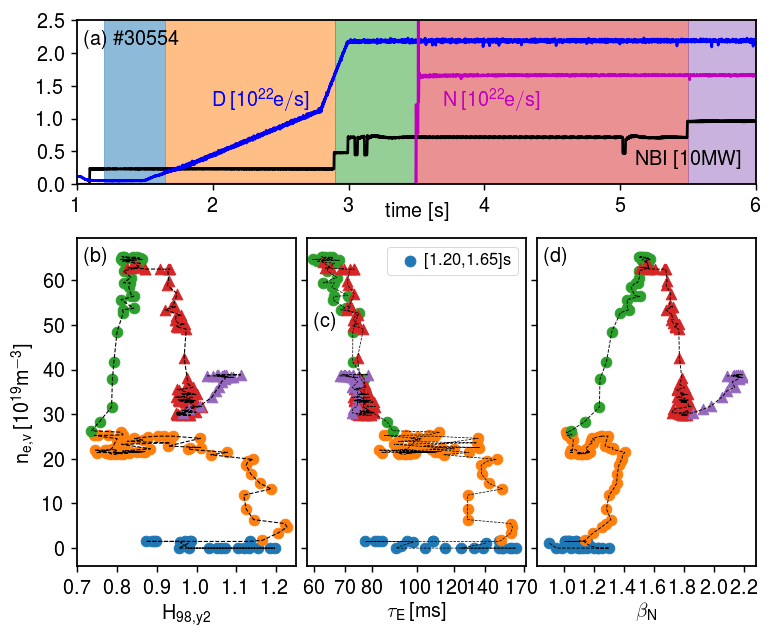

In [20]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(6,5.), dpi=130)

gs = gridspec.GridSpec(2, 3, height_ratios=[1, 2])
ticfont = 11
plt.rcParams.update({'font.size': ticfont})

ax1 = plt.subplot(gs[0, :])

ax1.plot(snbi.time, snbi.data*1e-7,color='k')
ax1.text(5.9,0.3,'NBI [10MW]',color='k',ha='right')

ax1.plot(sdtot.time, sdtot.data*1e-22,color='b')
ax1.text(2.0,1.2,r'$\mathrm{D\,[10^{22}e/s]}$', color='b',ha='left')

ax1.plot(sntot.time, sntot.data*1e-22,color='m')
plt.text(3.7,1.2,r'$\mathrm{N\,[10^{22}e/s]}$', color='m')

ax1.text(0.01, 0.85, '(a) \#30554', color='k', transform=ax1.transAxes)

alp=0.5
ax1.axvspan(1.2,timesint[0],color='C0',alpha=alp)
ax1.axvspan(timesint[0],timesint[1],color='C1',alpha=alp)
ax1.axvspan(timesint[1],timesint[2],color='C2',alpha=alp)
ax1.axvspan(timesint[2],timesint[3],color='C3',alpha=alp)
ax1.axvspan(timesint[3],6.0,color='C4',alpha=alp)

ax1.set_xlim(1,6)
ax1.set_ylim(0,2.5)
ax1.set_yticks([0.0,0.5,1.0,1.5,2.0,2.5])
ax1.set_ylim(bottom=0)
ax1.set_xlabel('time [s]', labelpad=-8)

ax2 = plt.subplot(gs[1, :-2],)
ax3 = plt.subplot(gs[1, 1:-1], sharey=ax2)
ax4 = plt.subplot(gs[1, 2:], sharey=ax2)

plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
###############################
ax2.set_ylabel(r'$\mathrm{n_{e,v}\,[10^{19}m^{-3}]}$')

###Scatters
for i in range(len(h98i)):
    mrk = 'o'
    if t[i]<timesint[0]:
        clr=clr2[0]
    elif (t[i]>=timesint[0]) & (t[i]<=timesint[1]):
        clr = clr2[1]
    elif (t[i]>=timesint[1]) & (t[i]<=timesint[2]):
        clr = clr2[2]
    elif (t[i]>=timesint[2]) & (t[i]<=timesint[3]):
        clr = clr2[3]
        mrk = '^'
    else:
        clr = clr2[4]
        mrk = '^'
    ax2.scatter(h98i[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
    ax3.scatter(itau[i]*1e3, rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
    ax4.scatter(ibeta[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)


#Force labels
ax2.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
ax2.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
ax2.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
ax2.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax2.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax2.plot(h98i, rx6i*1e-19, c='k', lw=0.6, ls='--')

ax2.set_xticks([0.7,0.8,0.9,1.0,1.1,1.2])

plt.legend(handletextpad=0.2, fontsize='small', frameon=False)
ax2.set_xlim(0.7,1.25)
ax2.set_xlabel(r'$\mathrm{H_{98,y2}}$')

#Force labels
ax3.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
#ax3.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
#ax3.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
#ax3.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
#ax3.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax3.plot(itau*1e3,rx6i*1e-19, c='k', lw=0.4, ls='--')

ax3.set_xlim(58,172)

#ax1.xaxis.set_ticks_position('none')
ax3.set_xscale('log')
ax3.minorticks_off()
#ax1.set_xticks([60])
#ax1.set_xticklabels([''])
ax3.set_xticks([60,70,80,100,120,140,170])
ax3.set_xticklabels(['60','70','80','100','120','140','170'])
ax3.legend(handletextpad=-0.1,labelspacing=0.2,fontsize='small')
ax3.set_xlabel(r'$\mathrm{\tau_E\,[ms]}$')

ax4.plot(ibeta, rx6i*1e-19, c='k', lw=0.5, ls='--')
ax4.set_xlabel(r'$\mathrm{\beta_{N}}$')
ax4.set_xticks([1.0,1.2,1.4,1.6,1.8,2.0,2.2])

xxx = 0.03
yyy = 0.93
ax2.text(xxx,yyy,'(b)',transform=ax2.transAxes)
ax3.text(xxx,yyy-0.2,'(c)',transform=ax3.transAxes)
ax4.text(xxx,yyy,'(d)',transform=ax4.transAxes)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05,hspace=0.22,bottom=0.14,top=0.98, right=0.98)
plt.savefig('./PresentationMST1/Figure8_1.png',dpi=300)
plt.show()